## Implementation of Auto encoders using tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/mnist/")

Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


In [3]:
# Model Parameters
learning_rate = 0.01
n_epochs = 20
batch_size = 256
display_step = 1

## Implement single layer encoder an decoder

In [4]:
# Network Parameters
n_input = 784
n_hidden_l1 = 256
n_output = 128

# tf Graph input
X = tf.placeholder("float", [None, n_input])

In [5]:
weights = {
    'encoder_w1': tf.Variable(tf.random_normal([n_input, n_hidden_l1])),
    'encoder_w2': tf.Variable(tf.random_normal([n_hidden_l1, n_output])),
    'decoder_w1': tf.Variable(tf.random_normal([n_output, n_hidden_l1])),
    'decoder_w2': tf.Variable(tf.random_normal([n_hidden_l1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_l1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_output])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_l1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [6]:
# Encoder
def encoder(x):
    # First layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_w1']), biases['encoder_b1']))
    
    
    # Output layer with sigmoid activation
    out_layer = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_w2']), biases['encoder_b2']))
    
    return out_layer

# Decoder
def decoder(x):
    
    # First layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_w1']), biases['decoder_b1']))
    
    # Output layer with sigmoid activation
    out_layer = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_w2']), biases['decoder_b2']))
    
    return out_layer

In [7]:
# Build a  model
encoder_model = encoder(X)
decoder_model = decoder(encoder_model)
# Encode input data
y_pred = decoder_model

# True labels
y_true = X

# root Mean squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

# RMSprop optimizer to reduce cost function
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [8]:
sess = tf.InteractiveSession()
sess.run(init)

n_batches = int(mnist.train.num_examples/batch_size)

# 20 epochs
for epoch in range(n_epochs):

    # Run all batches for each epoch
    for i in range(n_batches):
        xtr_batch, ytr_batch = mnist.train.next_batch(batch_size)

        # Run optimizer for each batch
        # c will hold the cost for each epoch
        _,c = sess.run([optimizer, cost], feed_dict={X: xtr_batch})


    # Display logs per each epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%2d' % (epoch+1), "cost=", "{:.5f}".format(c))

Epoch:  1 cost= 0.20842
Epoch:  2 cost= 0.17602
Epoch:  3 cost= 0.15834
Epoch:  4 cost= 0.14702
Epoch:  5 cost= 0.13723
Epoch:  6 cost= 0.12833
Epoch:  7 cost= 0.12421
Epoch:  8 cost= 0.12107
Epoch:  9 cost= 0.12036
Epoch: 10 cost= 0.11217
Epoch: 11 cost= 0.11061
Epoch: 12 cost= 0.10682
Epoch: 13 cost= 0.10346
Epoch: 14 cost= 0.09927
Epoch: 15 cost= 0.09894
Epoch: 16 cost= 0.09683
Epoch: 17 cost= 0.09559
Epoch: 18 cost= 0.09397
Epoch: 19 cost= 0.09452
Epoch: 20 cost= 0.09249


# Test model

/home/achal/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


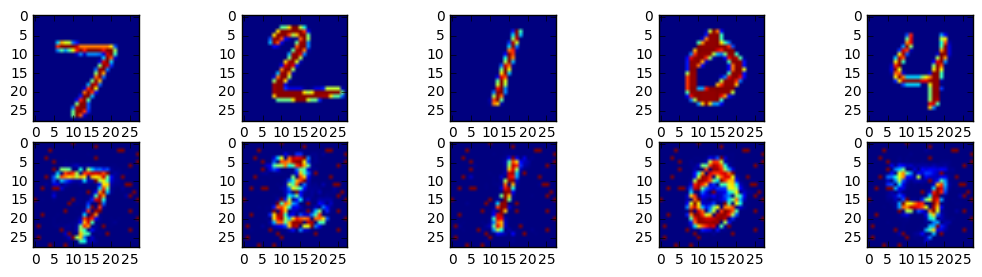

In [9]:
n_display_examples = 5

test = sess.run(y_pred, feed_dict={X: mnist.test.images[:n_display_examples]})

f, axisArr = plt.subplots(2, n_display_examples, figsize=(13, 3))

for i in range(n_display_examples):
    axisArr[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    axisArr[1][i].imshow(np.reshape(test[i], (28, 28)))
    
f.show()